In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
KNN = np.loadtxt('result_KNN.dat')
NB = np.loadtxt('result_NB.dat')
DT = np.loadtxt('result_DT.dat')
SVM = np.loadtxt('result_SVM.dat')
LR = np.loadtxt('result_LR.dat')
RF = np.loadtxt('result_RF.dat')
XGB = np.loadtxt('result_XGB.dat')
MLP = np.loadtxt('result_MLP.dat')
ER = np.loadtxt('result_ER_LAD.dat')

In [4]:
#number of methods
m = 9
# number of data sets
n = LR.shape[1]
print(m,n)

## accuracy
acc = np.zeros((m,n))

9 30


In [5]:
def number_winnings(acc,alpha=0.):
## find number of winning times for each method
    m,n = acc.shape
    n_wins = np.zeros(m)
    
    ## for each data
    #j = 0
    for j in range(n):
        #print('j:',acc[:,j])
        acc_max = max(acc[:,j])

        for i in range(m):
            if acc[i,j] >= (1-alpha)*acc_max:
                n_wins[i] += 1
    return n_wins

In [6]:
def select_metric(i):
    acc[0,:],acc[1,:],acc[2,:],acc[3,:],acc[4,:],acc[5,:],acc[6,:],acc[7,:],acc[8,:] = \
    KNN[i,:],NB[i,:],DT[i,:],SVM[i,:],MLP[i,:],LR[i,:,],XGB[i,:],RF[i,:],ER[i,:]
    
    return acc
    #return acc.mean(axis=1) # acc_std = acc.std(axis=1)

In [7]:
acc_av = np.zeros((5,m)) # accuracy, roc, precision, recall, f1score
n_wins = np.zeros((5,m))
for i in range(5):
    acc = select_metric(i)
    acc_av[i,:] = acc.mean(axis=1)
    n_wins[i,:] = number_winnings(acc,alpha=0.01)

print(acc_av)
print(n_wins)

[[0.82362847 0.85331333 0.85098067 0.87585083 0.86871533 0.8880063
  0.88385763 0.89639927 0.90508067]
 [0.7504542  0.80559573 0.82475983 0.8125121  0.8062979  0.8287662
  0.8495535  0.83961707 0.85264547]
 [0.80116223 0.83724453 0.83160603 0.81925417 0.8316799  0.8347952
  0.85579163 0.84690443 0.8508199 ]
 [0.7011457  0.7844029  0.80539913 0.822155   0.7925257  0.8362014
  0.84688777 0.83608183 0.8612654 ]
 [0.72854923 0.7950898  0.81100433 0.8084894  0.79983313 0.82904403
  0.8495331  0.8369398  0.8504635 ]]
[[ 4.  6.  9.  8. 10. 12. 15. 15. 21.]
 [ 2.  5.  8.  5.  4.  5. 11.  9. 16.]
 [ 5. 10. 11.  8.  4. 10. 11. 12. 12.]
 [ 1. 12. 13. 11.  8.  9. 10. 11. 12.]
 [ 2.  5.  9.  5.  4.  6. 12.  8. 12.]]


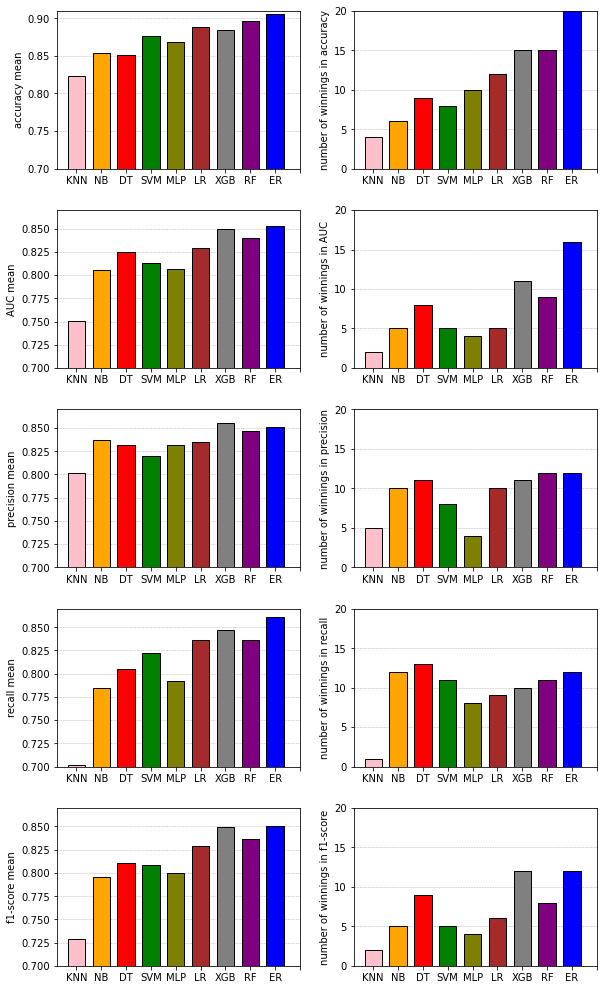

In [8]:
nx,ny = 2,5
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*4.2,ny*2.8))
   
xvalue = np.arange(m+1)
labels = ['KNN','NB','DT','SVM','MLP','LR','XGB','RF','ER']
colors = ['pink','orange','red','green','olive','brown','gray','purple','blue']
#patterns = ["|", "/", "\\", "-", ".", "*" ]

for j in range(ny):
    for i in range(m):
        #ax[0].barh(i,acc_av[i],color='white',edgecolor='black',\
        #          width=0.8,hatch=patterns[i],label=labels[i])

        ax[j,0].bar(i,acc_av[j,i],color=colors[i],edgecolor='black',width=0.7,label=labels[i],alpha=1.,zorder=0)
        ax[j,1].bar(i,n_wins[j,i],color=colors[i],edgecolor='black',width=0.7,label=labels[i],alpha=1.,zorder=0)
    
    for i in range(2): 
        ax[j,i].set_xticks(xvalue)
        ax[j,i].set_xticklabels(labels)
        ax[j,i].yaxis.grid(linestyle='--',linewidth='0.5',zorder=-1)
        ax[j,i].yaxis.set_zorder(level=-1)
    
ax[0,0].set_ylabel('accuracy mean')
ax[0,0].set_ylim([0.70,0.91])
ax[0,1].set_ylabel('number of winnings in accuracy')
ax[0,1].set_ylim([0,20])

ax[1,0].set_ylabel('AUC mean')
ax[1,0].set_ylim([0.7,0.87])
ax[1,1].set_ylabel('number of winnings in AUC')
ax[1,1].set_ylim([0,20])

ax[2,0].set_ylabel('precision mean')
ax[2,0].set_ylim([0.7,0.87])
ax[2,1].set_ylabel('number of winnings in precision')
ax[2,1].set_ylim([0,20])

ax[3,0].set_ylabel('recall mean')
ax[3,0].set_ylim([0.70,0.87])
ax[3,1].set_ylabel('number of winnings in recall')
ax[3,1].set_ylim([0,20])

ax[4,0].set_ylabel('f1-score mean')
ax[4,0].set_ylim([0.70,0.87])
ax[4,1].set_ylabel('number of winnings in f1-score')
ax[4,1].set_ylim([0,20])

plt.tight_layout(h_pad=1, w_pad=2.)

plt.savefig('fig2.pdf', format='pdf', dpi=100)